In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import pickle

In [16]:
df = pd.read_csv('data/cleaned_data.csv')

In [17]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [18]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [19]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
#Using pickle operation to serialize Logistic regression and save the serialized format to a file
# filename = 'finalized_knn.sav'
# pickle.dump(knn, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test)

In [21]:
#show first 5 model predictions on the test data
y_pred = knn.predict(X_test)

In [22]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7428571428571429

In [23]:
print("K nearest neighbours model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

K nearest neighbours model accuracy(in %): 74.28571428571429


In [24]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score

In [25]:
print (average_accuracy/542)
print (max)

73.00052714812864
81.71428571428572


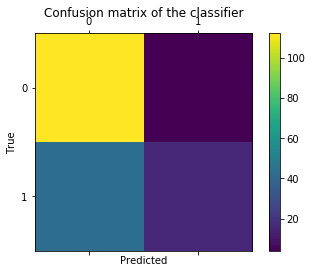

In [26]:
#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()